# Linear Regression

Linear regression is used to predict the value of one variable based on the value of other variables.
Here, the variable you want to predict is called the dependent variable and the variables that you use for prediction is called the independent variables. In simple Linear regression, we have one dependent variable and one (univariate) or more (multivariate) dependent variables.

Suppose we have a dataset $(\boldsymbol x_i, y_i)_{i=1}^n$ of size $n$. Here, a vector $\boldsymbol x_i$ denotes the dependent variables of dimension $p$. That is, we have $\boldsymbol x_i = (1, x _{i, 1}, \cdots, x _{i, m})$. Since here we discuss a simple linear regression model, our independent variable $y_i$ is just a scalar.

Using a matrix notation, we have

$$
\begin{align}
\boldsymbol Y = \begin{bmatrix} y_1 \\ y_2  \\ \vdots \\ y_n \end{bmatrix}
\end{align}
$$

and

$$
\begin{align}
\boldsymbol X = 
\begin{bmatrix} 
\boldsymbol 1 & x_{1,1} & \cdots & x_{1,m} \\ 
1 & x_{2,1} & \cdots & x_{2,m} \\ 
\vdots & \vdots & \ddots & \vdots \\ 1 & x_{n,1} & \cdots & x_{n,m} 
\end{bmatrix}
\end{align}
$$

so that

$$
\begin{align}
Y = \boldsymbol X \boldsymbol \beta + \boldsymbol \epsilon
\end{align}
$$

where 

$$
\begin{align}
\boldsymbol \beta =
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_m
\end{bmatrix}
\end{align}
$$

and

$$
\begin{align}
\boldsymbol \epsilon = \begin{bmatrix} \epsilon_1 \\ \vdots \\ \epsilon_n \end{bmatrix}.
\end{align}
$$

Here, $\epsilon_i$ for $i=1,\cdots,n$ denotes a random error following a normal distribution, $\epsilon_i \sim N(0, \sigma_i^2)$ for some standard deviation $\sigma_i$, one of the assumptions that we make about the model. Other assumptions include:
- The observatios are independent of each other. There is no dependency between independent variables, as the name suggests.
- The random variables have homogenous variance. That is, $\epsilon_1 = \epsilon_2 = \cdots = \epsilon_n$. We call this feature homoscedasticity.

Our goal is to create a model that best explains the relationship between the dependent variable and the independent varaibles. For this purpose, our model is a linear line that minimises MSE (mean squared error), the square of the distances between our predicted values and the real values.

Let us develop a model using scikit-learn library now.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

We first load the dataset. We can see that the dataset `diabetes` consists of `data` and `target` where the `data` has features `age`, `sex`, `bmi`, `bp`, `s1`, `s2`, `s3`, `s4`, `s5`, and `s6`.

In [30]:
# Load the dataset
diabetes = load_diabetes()
print(diabetes)
print("Feature names:",diabetes.feature_names)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

We now create a model and fit the model using the training data. For this, we first divide the dataset into two sets: the training set and the test set.\
Then, we fit the model using the training set.

In [31]:
# Seperate the data into train and the test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=3817)

# Set up the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

We now evaluate the performance of the model. One of the ways to do this is to calculate the $R^2$ score, available by `score` function.\
It calculates

$$
\begin{align}
\left( 1 - \frac{u}{v} \right).
\end{align}
$$

Here $u$ is the residual sum of squares $\sum_{i=1}^n (y_i - \hat y_i)^2$ and $v$ is the total sum of squares $\sum_{i=1}^n (y_i - \bar y_i)^2$  where $n$ is the number of observations in the test set.\
The highest $R^2$ score we can possibly have is 1.0, where $y_i=\hat y_i$ for all $i=1,\cdots,n$, and it can even have a negative value when the model is fitted very poorly.

In [32]:
model.score(X_test, y_test)

0.4400272323988693

Below we print the model intercept $\beta_0$ and the coefficients $\beta_1,\cdots, \beta_{10}$, each corresponding to the output of `diabetes.feature_names`.

In [5]:
print(model.intercept_, model.coef_)

151.47508848392727 [ -28.68952965 -220.49842238  503.36891715  362.83864258 -795.34054576
  365.92156747  173.95627188  308.36970656  716.57346986   78.01470239]


We can visualise the performance of the model as the plot below.\
The $x$-axis is for `y_text` and the $y$-axis is for `y_pred`. The more accurate our predictions are, the closer the dots are to the orange line.

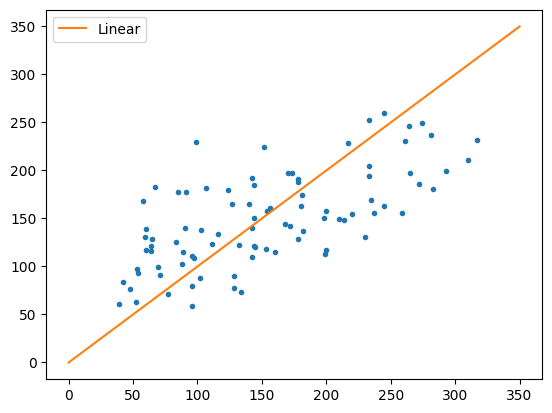

In [33]:
x = np.linspace(0, 350, 100)
y = x

fig = plt.figure()
plt.plot(y_test, y_pred, '.')
plt.plot(x, y, label='Linear')
plt.legend()
plt.show()

### Extrapolation

We need to be careful when predicting the response of to an input that lies outside of the range of the values in the predictor variables used to fit the model. 

### Polynomial Regression

Sometimes the relationship between our independent variables and the target variable is not linear, but polynomial. In this case, linear regression perform rather poorly, and we propose polynomial regression models, where our design matrix $\mathbf X$ is defined as:

$$
\begin{align}
\mathbf X=
\begin{bmatrix}
1 & x_{1,1} & x_{1,1}^2 & \cdots & x_{1,1}^p & \cdots & x_{1,m}^p 
\\
1 & x_{2,1} & x_{2,1}^2 & \cdots & x_{2,1}^p & \cdots & x_{2,m}^p 
\\
\vdots & \vdots & \vdots & \ddots & \vdots & \ddots & \vdots 
\\
1 & x_{n,1} & x_{n,1}^2 & \cdots & x_{n,1}^p & \cdots & x_{n,m}^p 
\end{bmatrix}
\end{align}
$$

for some degree $p$. We use `sklearn.preprocessing.PolynomialFeatures` to extend the degrees of our features.

In [27]:
n = 100 # 100 data points
X = 6 * np.random.rand(n,1)-4
poly_features = PolynomialFeatures(degree=2) # decide the maximal degree of the polynomial feature
X_poly = poly_features.fit_transform(X) # convert the original feature to polynomial feature
y = X**2 + 2 * X + 3 + np.random.rand(n,1)

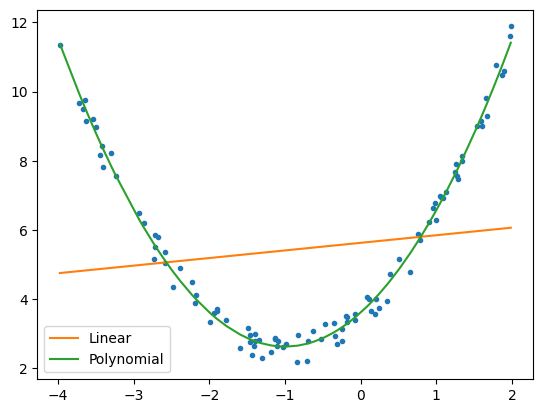

In [28]:
linear_model = LinearRegression()
polynomial_model = LinearRegression()

linear_model.fit(X, y)
polynomial_model.fit(X_poly, y)

X_new = np.sort(X, axis=0)
X_new_poly = poly_features.fit_transform(X_new)
y_pred = linear_model.predict(X_new)
y_pred_poly = polynomial_model.predict(X_new_poly)

fig = plt.figure()
plt.plot(X, y, '.')
plt.plot(X_new, y_pred, label='Linear')
#linear.set_label("Linear")
plt.plot(X_new, y_pred_poly, label='Polynomial')
#quadratic.set_label("Quadratic")
plt.legend()
plt.show()
